In [63]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
from sl_utilities import distance_functions
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"
snap=650 #this is the snapshot at which the clusters were taken from using the fof algorithm I am using this to extract information from the snapshot where the clusters were first seen
filename_gmc = 'cloud_props_m12i_mhd_stamp_fire2650.txt'
#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/mhdcv/m12i_res7100_mhdcv/1Myr/sf-fire3/'
datapath="./"+simtype+"_data_pkl/" #this is teh path where the data of our tracked clusters is
gas_datapath="./"+simtype+"_gas_data_pkl/"
dirname_gmc = './' #change this! 

plot_path="./"+simtype+"_plots_with_gas/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

###############################
##############################
#load gmc catalog data
data_gmc  = astropy.io.ascii.read(dirname_gmc+filename_gmc) #data_gmc.keys() #to see content
#gind = np.where(data_gmc['mass'] > 1e6)  #leave this commented for now

gxcm  = data_gmc['xcm']
gycm  = data_gmc['ycm']
gzcm  = data_gmc['zcm']
gmtot = data_gmc['mass']
gr90  = data_gmc['r_90']
gn = len(gxcm)

############################
############################
#Doing all this trouble to store the initial mass of the clusters
fn_associations=simtype+"_associations_"+simname+"_snapshot_"+str(snap)+".pkl"  #snap determines where the cluster was taken from
fn_clusters=simtype+"_clusters_"+simname+"_snapshot_"+str(snap)+".pkl" 
with open(datapath+fn_associations, "rb") as input:
    association_data = pickle.load(input)

with open(datapath+fn_clusters, "rb") as input:
    cluster_data = pickle.load(input)
    
clustermass=[]   #it stores the mass of each cluster that was in the beginning

for c in range(len(cluster_data)):
    m=np.sum(cluster_data[c+1]["mtot"])
    clustermass.append(m)
print("These are the initial mass of each star in the cluster",clustermass)
############################
############################

print("########################## TEST: This is cluster data from first cluster",cluster_data[1])
print("####################### Total clusters present is",len(cluster_data))
print("####################### Total associations present is",len(association_data))
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

These are the initial mass of each star in the cluster [94423.125, 90358.2978515625, 37171.0576171875, 47442.3740234375, 36869.751953125, 50955.5146484375, 43492.63818359375, 50664.0185546875]
########################## TEST: This is cluster data from first cluster {'cluster_groupid': 1, 'no_of_star': 9, 'id': array([57985402, 13825809, 46015736, 49664520, 51924805, 56315901,
       50643340, 38934655, 30988704], dtype=uint32), 'id_children': array([0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint32), 'is_embedded': True, 'xcm': 11.878707129763374, 'ycm': -4.8819310023261036, 'zcm': 0.11740253066873504, 'mtot': 94423.125, 'r90': 0.005445430774540798, 'r50': 0.003884939574726055, 'rmax': 0.005776270440458906, 'x': array([11.88110893, 11.87962594, 11.881522  , 11.88015788, 11.88109435,
       11.8793116 , 11.87724612, 11.87379301, 11.87525297]), 'y': array([-4.87685155, -4.88042438, -4.87878441, -4.88101534, -4.88376236,
       -4.88665361, -4.88489877, -4.88382776, -4.88219972]), 'z': array([0.11

!!!!!!!!rcm: 12.8433140871183 True
!!!!!!!!rcm: 6.9194942808165445 True
!!!!!!!!rcm: 11.37509493141503 True
!!!!!!!!rcm: 8.314772117432128 True
!!!!!!!!rcm: 5.04764314016792 True
!!!!!!!!rcm: 4.662956127260962 False
!!!!!!!!rcm: 7.276307701809478 True
gind: [1] drmin: 0.08255934240245132
This is the gas cloud gxcm: -4.8738143569764745
!!!!!!!!rcm: 7.269774644083394 True
gind: [1] drmin: 0.07594667063598695
This is the gas cloud gxcm: -4.8738143569764745
5.415582078145395


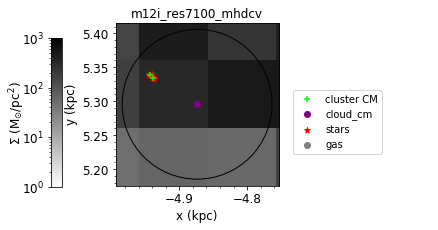

In [64]:
gas_datapath="./"+simtype+"_gas_data_pkl/"
file_name=simtype+"_gas_data"+str(snap)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
    import_gasdata = pickle.load(input)

v=import_gasdata["v"]
face=import_gasdata["face"]
xGas=import_gasdata["xGas"]
yGas=import_gasdata["yGas"]    

face=import_gasdata["face"]
xh=import_gasdata["xh"]
yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
  
    
fig1=plt.figure()
fig1.set_size_inches(4,3)
ax=fig1.add_subplot(1,1,1)
ax.set_title(simname)
cluster_count=0
for i in range(len(cluster_data)):                              
    xcm=cluster_data[cluster_count+1]["xcm"]
    ycm=cluster_data[cluster_count+1]["ycm"]
    zcm=cluster_data[cluster_count+1]["zcm"]
    x=cluster_data[cluster_count+1]["x"]
    y=cluster_data[cluster_count+1]["y"]
    z=cluster_data[cluster_count+1]["z"]
    rcm=(xcm**2+ycm**2+zcm**2)**(1/2)
    embedded_check=cluster_data[cluster_count+1]["is_embedded"]
    print("!!!!!!!!rcm:",rcm,embedded_check)
    if (rcm>= 7) and (rcm <= 8) and (embedded_check == True):
        gind, drmin = distance_functions.closest_cluster_index(xcm, ycm, zcm, gxcm, gycm, gzcm)
        print("gind:",gind,"drmin:",drmin)
        #print(i,sxcm[i], sycm[i], gxcm[gind][0], gycm[gind][0])
        #gas=ax.scatter(xGas,yGas,c="grey")
        g=ax.scatter(gxcm[gind],gycm[gind],label="cloud",c="purple")
        s=ax.scatter(x,y,label="stars",marker="*",c="red")
        c=ax.scatter(xcm,ycm,label="clusterscm",marker="+",c="lime")
        print("This is the gas cloud gxcm:",gxcm[gind][0])
    cluster_count+=1

circle=plt.Circle((gxcm[gind][0],gycm[gind][0]),gr90[gind][0],fill=False)
ax.add_patch(circle)
im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 

ax.minorticks_on()
ax.tick_params(labelsize=12)
ax.set_xlabel("x (kpc)",fontsize=12)
ax.set_ylabel("y (kpc)",fontsize=12)  
ax.set_xlim(gxcm[1]-0.12,gxcm[1]+0.12)
ax.set_ylim(gycm[1]-0.12,gycm[1]+0.12)

#colorbar for the background gas density
cmap_gray = matplotlib.cm.get_cmap('binary')
norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
cbar_ax1 = fig1.add_axes([0.005, 0.12, 0.04, 0.69]) # position of gray colorbar (left, bottom, width, height)
cb1 = fig1.colorbar(im, cax=cbar_ax1, ticklocation='left')
cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)

print(ax.get_ylim()[1])


fig1.legend((c,g,s,gas), ("cluster CM","cloud_cm","stars","gas"),bbox_to_anchor=(1,0.5), loc='center left')
plot_name=simname+"clusters_and_gas_cloud_zoom_in.png"
fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
plt.show()

In [ ]:
gas_datapath="./"+simtype+"_gas_data_pkl/"
file_name=simtype+"_gas_data"+str(snap)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
    import_gasdata = pickle.load(input)

v=import_gasdata["v"]
face=import_gasdata["face"]
xGas=import_gasdata["xGas"]
yGas=import_gasdata["yGas"]    

face=import_gasdata["face"]
xh=import_gasdata["xh"]
yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
  
    
fig1=plt.figure()
fig1.set_size_inches(4,3)
ax=fig1.add_subplot(1,1,1)
ax.set_title(simname)
cluster_count=0
for i in range(len(cluster_data)):                              
    xcm=cluster_data[cluster_count+1]["xcm"]
    ycm=cluster_data[cluster_count+1]["ycm"]
    zcm=cluster_data[cluster_count+1]["zcm"]
    x=cluster_data[cluster_count+1]["x"]
    y=cluster_data[cluster_count+1]["y"]
    z=cluster_data[cluster_count+1]["z"]
    rcm=(xcm**2+ycm**2+zcm**2)**(1/2)
    embedded_check=cluster_data[cluster_count+1]["is_embedded"]
    print("!!!!!!!!rcm:",rcm,embedded_check)
    if (rcm>= 7) and (rcm <= 8) and (embedded_check == True):
        gind, drmin = distance_functions.closest_cluster_index(xcm, ycm, zcm, gxcm, gycm, gzcm)
        print("gind:",gind,"drmin:",drmin)
        #print(i,sxcm[i], sycm[i], gxcm[gind][0], gycm[gind][0])
        gas=ax.scatter(xGas,yGas,c="grey")
        g=ax.scatter(gxcm[gind],gycm[gind],label="cloud",c="purple")
        s=ax.scatter(x,y,label="stars",marker="*",c="red")
        c=ax.scatter(xcm,ycm,label="clusterscm",marker="+",c="lime")
        print("This is the gas cloud gxcm:",gxcm[gind][0])
    cluster_count+=1

circle=plt.Circle((gxcm[gind][0],gycm[gind][0]),gr90[gind][0],fill=False)
ax.add_patch(circle)

ax.minorticks_on()
ax.tick_params(labelsize=12)
ax.set_xlabel("x (kpc)",fontsize=12)
ax.set_ylabel("y (kpc)",fontsize=12)  
ax.set_xlim(gxcm[1]-0.12,gxcm[1]+0.12)
ax.set_ylim(gycm[1]-0.12,gycm[1]+0.12)
ax.axes.set_aspect('equal')


fig1.legend((c,g,s,gas), ("cluster CM","cloud_cm","stars","gas"),bbox_to_anchor=(0.755,0.5), loc='center left')
plot_name=simname+"clusters_and_gas_cloud_zoom_in_all_gas.png"
fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
plt.show()

!!!!!!!!rcm: 12.8433140871183 True
!!!!!!!!rcm: 6.9194942808165445 True
!!!!!!!!rcm: 11.37509493141503 True
!!!!!!!!rcm: 8.314772117432128 True
!!!!!!!!rcm: 5.04764314016792 True
!!!!!!!!rcm: 4.662956127260962 False
!!!!!!!!rcm: 7.276307701809478 True
gind: [1] drmin: 0.08255934240245132
This is the gas cloud gxcm: -4.8738143569764745
!!!!!!!!rcm: 7.269774644083394 True
gind: [1] drmin: 0.07594667063598695
This is the gas cloud gxcm: -4.8738143569764745


[-3. -1.  1.]
[[-3. -1.  1.]
 [-3. -1.  1.]
 [-3. -1.  1.]]
This is z:  [9.07957372e-05 2.69999641e-01 2.34039289e-01]
This is z:  [ 9.05747892e-05  2.34039289e-01 -1.72932943e+00]


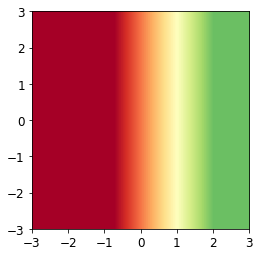

In [17]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch


# Fixing random state for reproducibility
np.random.seed(19680801)



delta = 2
x = y = np.arange(-3.0, 3.0, delta)
print(x)
X, Y = np.meshgrid(x, y)
print(X)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
print("This is z: ",Z[1])
print("This is z: ",Z[2])
fig, ax = plt.subplots()
im = ax.imshow(X, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()